<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Read-inelas-reactions" data-toc-modified-id="Read-inelas-reactions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Read inelas reactions</a></span></li><li><span><a href="#Set-parameters" data-toc-modified-id="Set-parameters-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Set parameters</a></span></li><li><span><a href="#Evolve" data-toc-modified-id="Evolve-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Evolve</a></span></li><li><span><a href="#plot" data-toc-modified-id="plot-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>plot</a></span><ul class="toc-item"><li><span><a href="#plot-final" data-toc-modified-id="plot-final-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>plot final</a></span></li></ul></li></ul></div>

In [1]:
%cd ..

C:\Users\LiuJinbao\Documents\Code\PlasmaChemistry


In [2]:
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt
from plasmistry.electron import EEDF
from plasmistry.electron import get_maxwell_eedf
from plasmistry.molecule import get_ideal_gas_density
from plasmistry.reactions import (CoefReactions, CrosReactions)

In [3]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,9)
plt.rcParams["font.size"] = 14

In [4]:
np.set_printoptions(precision=1, linewidth=130, edgeitems=5)
pd.options.display.float_format = '{:,.1e}'.format

# Read inelas reactions

In [23]:
cros_rctn_df = pd.read_pickle('cros_rctn_df.pkl')
coef_rctn_df = pd.read_pickle('coef_rctn_df.pkl')

In [30]:
cros_rctn_df.columns

Index(['formula', 'type', 'threshold_eV', 'cross_section'], dtype='object')

In [28]:
coef_rctn_df.columns

Index(['formula', 'type', 'reactant', 'product', 'kstr'], dtype='object')

In [24]:
species = pd.read_pickle("species.pkl")

In [27]:
eedf = EEDF(max_energy_eV=50, grid_number=500)
eedf.initialize(rctn_with_crostn_df=cros_rctn_df, total_species=species.to_list())

In [34]:
rctn = CoefReactions(species=species, reactant=coef_rctn_df["reactant"], 
                     product=coef_rctn_df["product"],
                    k_str=coef_rctn_df["kstr"])
rctn.compile_k_str()

In [33]:
# rctn.set_rate_const(Tgas_K=Tgas_K)
# rctn.set_rate(density)
# return get_dn

# def dndt_all(t, y):
#     eedf.set_parameters()
#     eedf.set_density_per_J(y)
 #    eedf.set_flux(total_species_density=total_species_density)
#     return eedf.get_deriv_total(total_species_density=total_species_density) 

# Set parameters

In [32]:
eedf.set_parameters(E=1e6, Tgas=1000, N=N)

# Evolve

In [37]:
total_species_density = np.ones(len(species))
# total_species_density = np.array([0,1,0,0,0])*N
def dndt_all(t, y):
    eedf.set_density_per_J(y)
    eedf.set_flux(total_species_density=total_species_density)
    return eedf.get_deriv_total(total_species_density=total_species_density) 

In [38]:
y0 = get_maxwell_eedf(eedf.energy_point, Te_eV=0.7)*1e17
time_span = [0, 1e3]
sol = solve_ivp(dndt_all, time_span, y0, method="BDF", rtol=5e-2)

In [39]:
sol.t

array([0.0e+00, 4.1e-16, 8.2e-16, 4.9e-15, 9.0e-15, 4.2e-14, 7.4e-14, 1.4e-13, 2.1e-13, 2.8e-13, 4.0e-13, 5.2e-13, 6.3e-13,
       7.5e-13, 9.1e-13, 1.1e-12, 1.2e-12, 1.4e-12, 1.6e-12, 1.8e-12, 2.0e-12, 2.2e-12, 2.5e-12, 2.7e-12, 3.0e-12, 3.3e-12,
       3.6e-12, 3.9e-12, 4.2e-12, 4.6e-12, 5.0e-12, 5.4e-12, 5.8e-12, 6.2e-12, 6.7e-12, 7.3e-12, 7.8e-12, 8.3e-12, 9.0e-12,
       9.7e-12, 1.0e-11, 1.1e-11, 1.2e-11, 1.3e-11, 1.4e-11, 1.5e-11, 1.6e-11, 1.8e-11, 1.9e-11, 2.1e-11, 2.2e-11, 2.4e-11,
       2.8e-11, 3.1e-11, 3.5e-11, 3.8e-11, 4.2e-11, 4.5e-11, 5.4e-11, 6.3e-11, 7.3e-11, 8.2e-11, 9.1e-11, 1.2e-10, 1.4e-10,
       1.7e-10, 1.9e-10, 2.5e-10, 3.1e-10, 3.7e-10, 4.6e-10, 5.5e-10, 6.4e-10, 7.4e-10, 1.4e-09, 2.0e-09, 2.6e-09, 5.1e-09,
       7.6e-09, 3.3e-08, 5.8e-08, 3.1e-07, 5.6e-07, 3.1e-06, 5.6e-06, 3.1e-05, 5.6e-05, 3.1e-04, 5.6e-04, 8.7e-04, 9.1e-04,
       9.5e-04, 1.3e-03, 1.5e-03, 1.7e-03, 3.7e-03, 5.7e-03, 2.5e-02, 4.5e-02, 2.4e-01, 3.4e-01, 3.9e-01, 4.4e-01, 5.6e-01,
       6

In [40]:
len(sol.t)

119

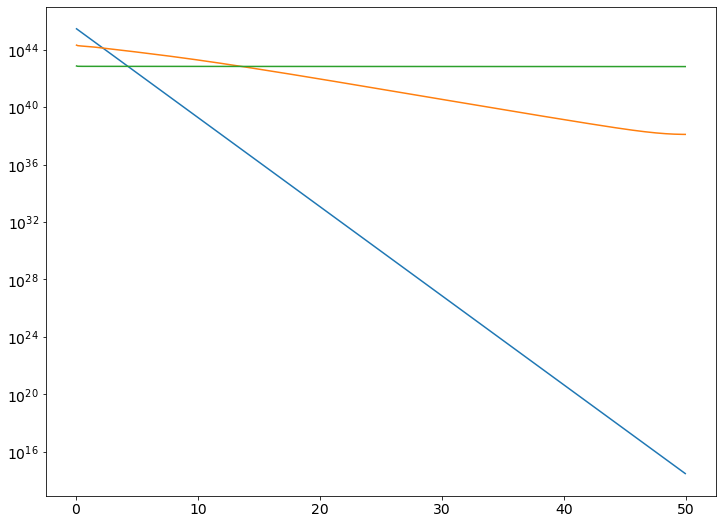

In [41]:
plt.semilogy(eedf.energy_point_eV, (sol.y.transpose()/np.sqrt(eedf.energy_point)).transpose()[:,::50])

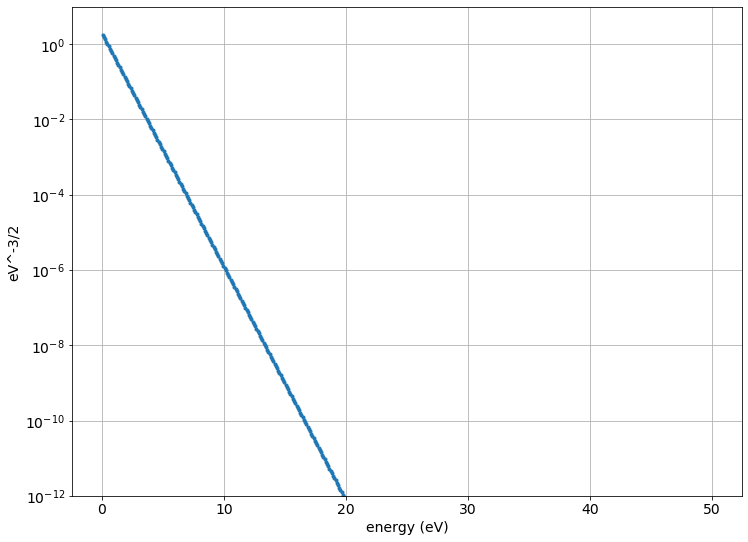

In [42]:
eedf.set_density_per_J(sol.y[:,0])
eedf.plot_normalized_eepf()

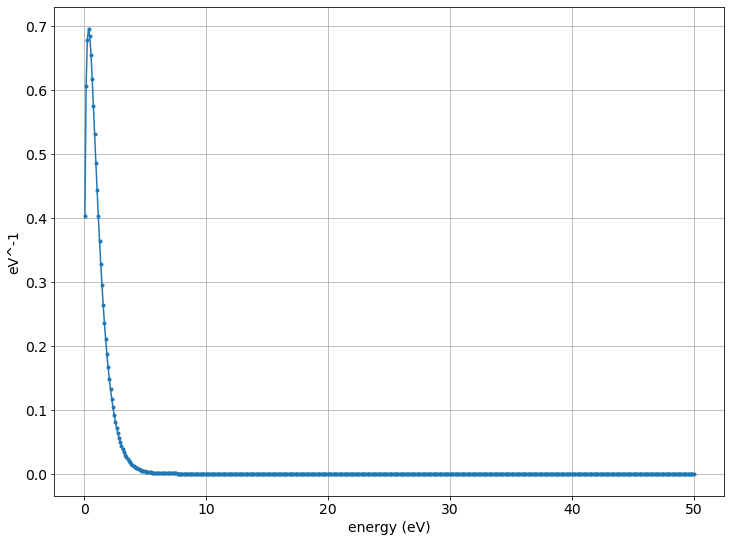

In [43]:
eedf.plot_normalized_eedf()

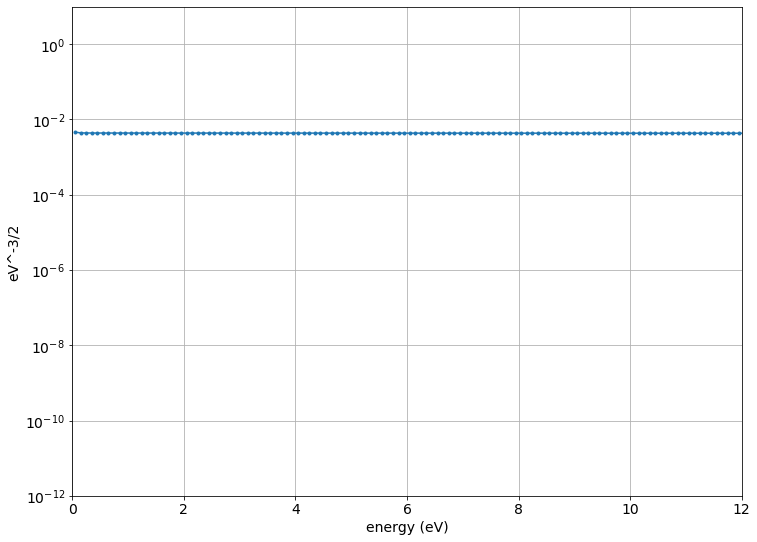

In [44]:
eedf.set_density_per_J(sol.y[:,-1])
eedf.plot_normalized_eepf(xlim=(0,12), ylim=(1e-12, 1e1))

In [45]:
print(eedf)


        
        
               ENERGY SPACE (eV) : (0.0, 50.0)
        
     NUMBER OF DISCRETIZED CELLS : 500 cells
        
            ENERGY INTERVAL (eV) : 0.100 
        
        
            ELECTRON TEMPERATURE : 19.9183 eV
        
            ELECTRON MEAN ENERGY : 29.8775 eV
        
                ELECTRON DENSITY : 1.00e+17 m^-3
        
        
              ELECTRIC FIELD (E) : 1000000 V/m (10.00 kV/cm) 
        
          GAS TEMPERATURE (Tgas) : 1000 K
        
 BACKGROUND MOLECULE DENSITY (N) : 7.2e+24 m^-3
        
    REDUCED ELECTRIC FIELD (E/N) : 138.1 Td
        
        
     ELASTIC COLLISION MOLECULES : ['H2', 'CO2', 'CO', 'O2', 'H2O']
        
   INELASTIC COLLISION MOLECULES : ['CO' 'CO(v1)' 'CO(v10)' 'CO(v2)' 'CO(v3)' 'CO(v4)' 'CO(v5)' 'CO(v6)' 'CO(v7)' 'CO(v8)' 'CO(v9)' 'CO2' 'CO2(v1)' 'CO2(v10)'
 'CO2(v11)' 'CO2(v12)' 'CO2(v13)' 'CO2(v14)' 'CO2(v15)' 'CO2(v16)' 'CO2(v17)' 'CO2(v18)' 'CO2(v19)' 'CO2(v2)' 'CO2(v20)'
 'CO2(v21)' 'CO2(v3)' 'CO2(v4)' 'CO2

In [46]:
eedf._get_molecule_rate_const_e_inelas()

array([1.0e-15, 6.1e-17, 8.1e-18, 1.7e-15, 1.0e-16, 1.3e-17, 2.5e-15, 1.4e-16, 1.9e-17, 3.5e-15, 2.0e-16, 2.7e-17, 5.0e-15,
       2.9e-16, 3.8e-17, 7.1e-15, 4.1e-16, 5.4e-17, 9.9e-15, 5.7e-16, 7.5e-17, 1.4e-14, 7.9e-16, 1.0e-16, 1.9e-14, 1.1e-15,
       1.4e-16, 2.5e-14, 1.4e-15, 1.8e-16, 3.2e-14, 1.9e-15, 2.4e-16, 4.2e-14, 2.4e-15, 3.1e-16, 5.2e-14, 3.0e-15, 6.5e-14,
       1.0e-15, 6.1e-17, 1.7e-15, 8.1e-18, 1.0e-16, 2.5e-15, 1.3e-17, 1.4e-16, 3.5e-15, 1.9e-17, 2.0e-16, 5.0e-15, 2.7e-17,
       2.9e-16, 7.1e-15, 3.8e-17, 4.1e-16, 9.9e-15, 5.4e-17, 5.7e-16, 1.4e-14, 7.5e-17, 7.9e-16, 1.9e-14, 1.0e-16, 1.1e-15,
       2.5e-14, 1.4e-16, 1.4e-15, 3.2e-14, 1.8e-16, 1.9e-15, 4.2e-14, 2.4e-16, 2.4e-15, 5.2e-14, 3.1e-16, 3.0e-15, 6.5e-14,
       4.1e-15, 4.3e-15, 4.5e-15, 4.6e-15, 4.8e-15, 5.0e-15, 5.1e-15, 5.3e-15, 5.4e-15, 5.5e-15, 5.6e-15, 5.7e-15, 5.8e-15,
       5.7e-15, 3.9e-15, 2.4e-15, 1.5e-15, 3.9e-15, 2.4e-15, 1.5e-15, 3.9e-15, 2.4e-15, 1.5e-15, 3.9e-15, 2.4e-15, 1.5e-15,
       3

[Text(0, 0, 'E + H2 => E + H2(v1)'),
 Text(0, 0, 'E + H2 => E + H2(v2)'),
 Text(0, 0, 'E + H2 => E + H2(v3)'),
 Text(0, 0, 'E + H2(v1) => E + H2(v2)'),
 Text(0, 0, 'E + H2(v1) => E + H2(v3)'),
 Text(0, 0, 'E + H2(v1) => E + H2(v4)'),
 Text(0, 0, 'E + H2(v2) => E + H2(v3)'),
 Text(0, 0, 'E + H2(v2) => E + H2(v4)'),
 Text(0, 0, 'E + H2(v2) => E + H2(v5)'),
 Text(0, 0, 'E + H2(v3) => E + H2(v4)'),
 Text(0, 0, 'E + H2(v3) => E + H2(v5)'),
 Text(0, 0, 'E + H2(v3) => E + H2(v6)'),
 Text(0, 0, 'E + H2(v4) => E + H2(v5)'),
 Text(0, 0, 'E + H2(v4) => E + H2(v6)'),
 Text(0, 0, 'E + H2(v4) => E + H2(v7)'),
 Text(0, 0, 'E + H2(v5) => E + H2(v6)'),
 Text(0, 0, 'E + H2(v5) => E + H2(v7)'),
 Text(0, 0, 'E + H2(v5) => E + H2(v8)'),
 Text(0, 0, 'E + H2(v6) => E + H2(v7)'),
 Text(0, 0, 'E + H2(v6) => E + H2(v8)'),
 Text(0, 0, 'E + H2(v6) => E + H2(v9)'),
 Text(0, 0, 'E + H2(v7) => E + H2(v8)'),
 Text(0, 0, 'E + H2(v7) => E + H2(v9)'),
 Text(0, 0, 'E + H2(v7) => E + H2(v10)'),
 Text(0, 0, 'E + H2(v8) => 

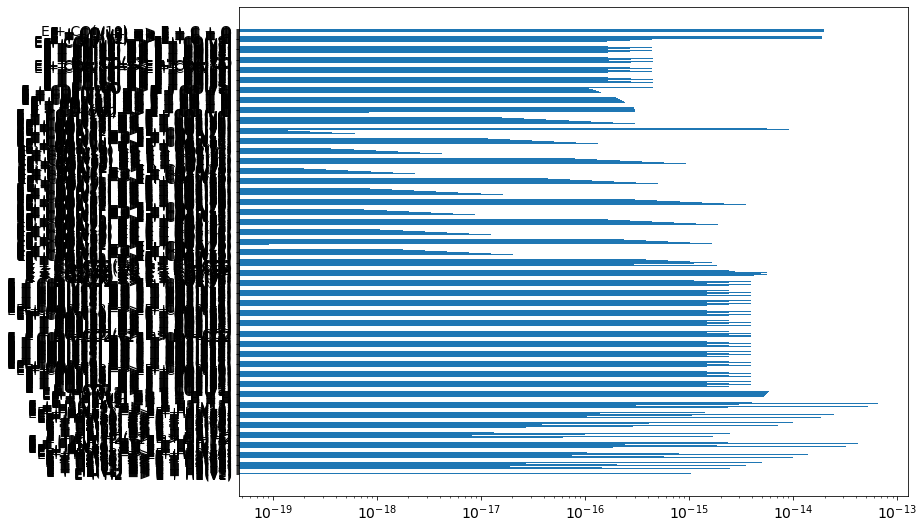

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.barh(range(eedf.n_inelas_rctn),
        width=eedf._get_molecule_rate_const_e_inelas(),
        height=0.6, log=True)
ax.set_yticks(range(eedf.n_inelas_rctn))
ax.set_yticklabels(eedf.inelas_reaction_dataframe['formula'])

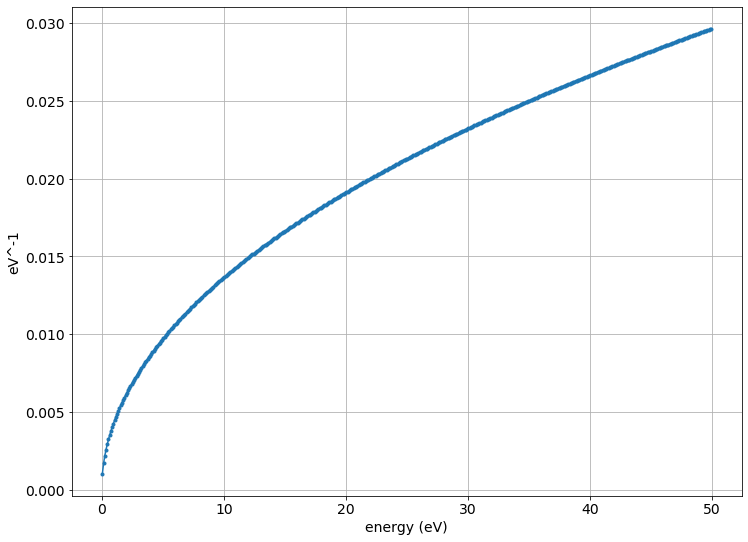

In [48]:
eedf.plot_normalized_eedf()

Text(0.5, 1.0, 'Te vs. t')

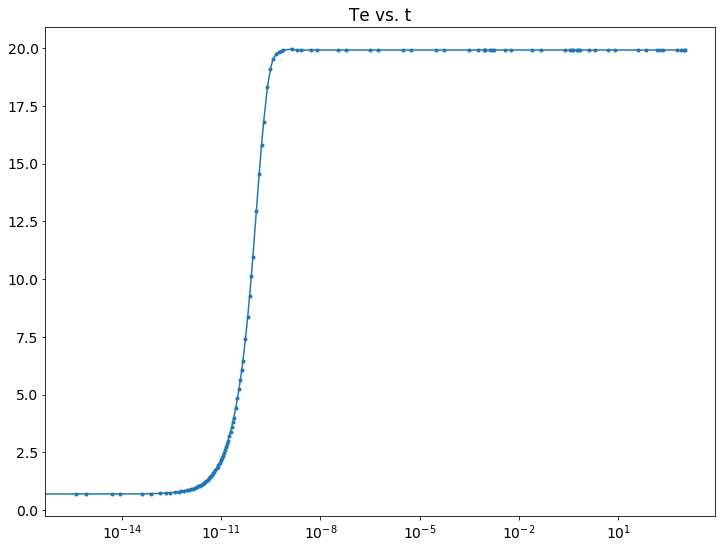

In [49]:
Te_seq = []
ne_seq = []
for _array in sol.y.transpose():
    eedf.set_density_per_J(_array)
    Te_seq.append(eedf.electron_temperature_in_eV)
    ne_seq.append(eedf.electron_density)
plt.semilogx(sol.t, Te_seq, marker='.')
plt.title("Te vs. t")

Text(0.5, 1.0, 'ne vs. t')

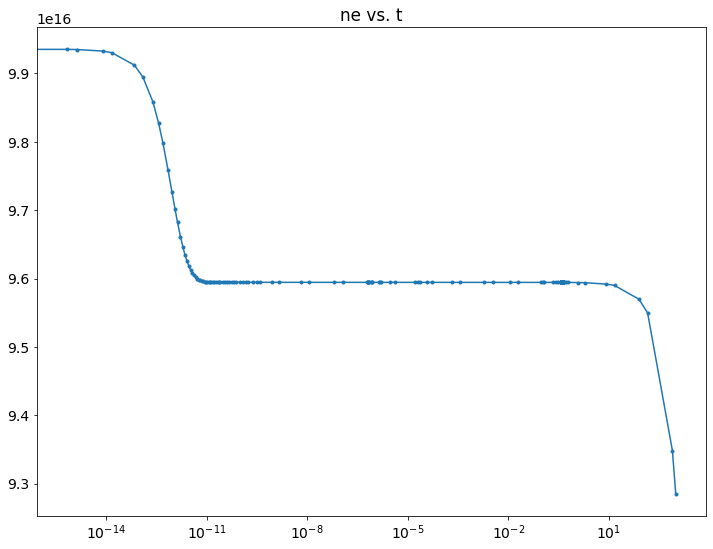

In [40]:
plt.semilogx(sol.t, ne_seq, marker='.')
plt.title("ne vs. t")

In [41]:
sol.y

array([[2.5e+35, 2.5e+35, 2.5e+35, 2.6e+35, 2.6e+35, ..., 1.1e+36, 1.1e+36, 1.1e+36, 1.1e+36, 1.1e+36],
       [3.8e+35, 3.8e+35, 3.8e+35, 3.8e+35, 3.9e+35, ..., 1.1e+36, 1.1e+36, 1.1e+36, 1.0e+36, 1.0e+36],
       [4.2e+35, 4.2e+35, 4.2e+35, 4.3e+35, 4.3e+35, ..., 8.1e+35, 8.1e+35, 8.1e+35, 7.9e+35, 7.9e+35],
       [4.3e+35, 4.3e+35, 4.3e+35, 4.3e+35, 4.3e+35, ..., 5.8e+35, 5.8e+35, 5.8e+35, 5.7e+35, 5.6e+35],
       [4.2e+35, 4.2e+35, 4.2e+35, 4.2e+35, 4.2e+35, ..., 4.3e+35, 4.3e+35, 4.3e+35, 4.2e+35, 4.1e+35],
       ...,
       [1.5e+06, 1.5e+06, 1.5e+06, 1.6e+06, 1.7e+06, ..., 1.1e+24, 1.1e+24, 1.1e+24, 1.1e+24, 1.1e+24],
       [1.3e+06, 1.3e+06, 1.3e+06, 1.4e+06, 1.5e+06, ..., 1.1e+24, 1.1e+24, 1.1e+24, 1.1e+24, 1.1e+24],
       [1.2e+06, 1.2e+06, 1.2e+06, 1.3e+06, 1.4e+06, ..., 1.1e+24, 1.1e+24, 1.1e+24, 1.1e+24, 1.1e+24],
       [1.0e+06, 1.0e+06, 1.0e+06, 1.1e+06, 1.3e+06, ..., 1.1e+24, 1.1e+24, 1.1e+24, 1.1e+24, 1.1e+24],
       [8.7e+05, 9.0e+05, 9.2e+05, 1.1e+06, 1.2e+06,

In [42]:
eedf.set_density_per_J(sol.y[:,-1])
eedf.set_flux(total_species_density=total_species_density)

# plot

## plot final

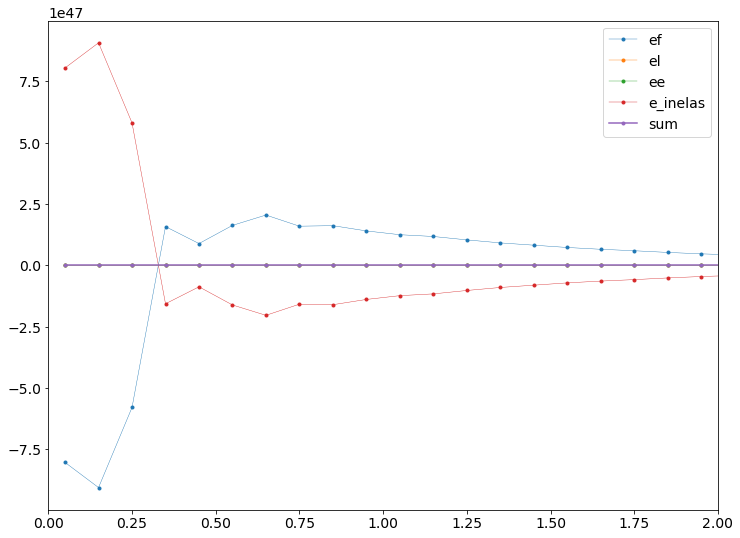

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(eedf.energy_point_eV, eedf._get_deriv_ef(), 
        linewidth=0.4, marker='.', label='ef')
ax.plot(eedf.energy_point_eV, eedf._get_deriv_el(), 
        linewidth=0.4, marker='.', label='el')
ax.plot(eedf.energy_point_eV, eedf._get_deriv_ee(), 
        linewidth=0.4, marker='.', label='ee')
ax.plot(eedf.energy_point_eV, eedf._get_electron_rate_e_inelas(density=total_species_density), 
        linewidth=0.4, marker='.', label='e_inelas')
ax.plot(eedf.energy_point_eV, eedf.get_deriv_total(total_species_density=total_species_density), 
        linewidth=1.5, marker='.', label='sum')
# ax.plot(eedf.energy_nodes,eedf.J_flux_el, marker='.', label='el')
# ax.plot(eedf.energy_nodes,eedf.J_flux_ee, marker='.', label='ee')
# ax.plot(eedf.energy_nodes,eedf.J_flux_ef+eedf.J_flux_el+eedf.J_flux_ee, marker='.', label='ef+el+ee')
# ax.set_yscale('symlog')
# ax.set_xscale('log')
ax.set_xlim((0,2))
ax.legend()

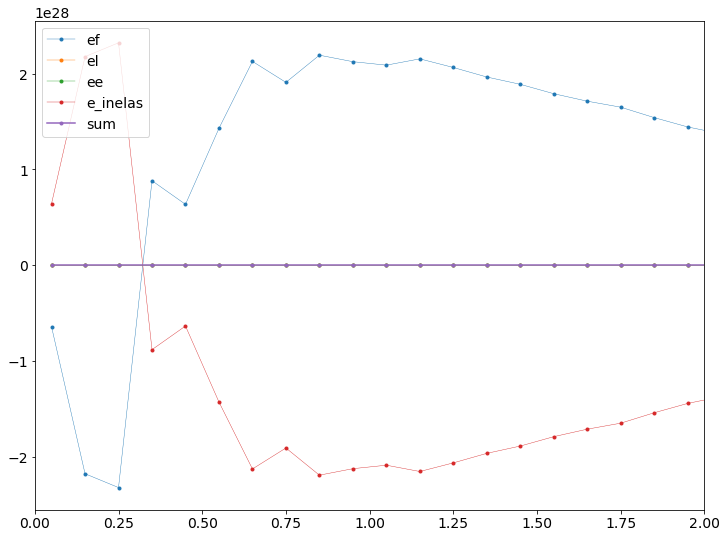

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(eedf.energy_point_eV, eedf._get_deriv_ef()*eedf.energy_point, 
        linewidth=0.4, marker='.', label='ef')
ax.plot(eedf.energy_point_eV, eedf._get_deriv_el()*eedf.energy_point, 
        linewidth=0.4, marker='.', label='el')
ax.plot(eedf.energy_point_eV, eedf._get_deriv_ee()*eedf.energy_point, 
        linewidth=0.4, marker='.', label='ee')
ax.plot(eedf.energy_point_eV, eedf._get_electron_rate_e_inelas(density=total_species_density)*eedf.energy_point, 
        linewidth=0.4, marker='.', label='e_inelas')
ax.plot(eedf.energy_point_eV, eedf.get_deriv_total(total_species_density=total_species_density)*eedf.energy_point, 
        linewidth=1.5, marker='.', label='sum')
# ax.plot(eedf.energy_nodes,eedf.J_flux_el, marker='.', label='el')
# ax.plot(eedf.energy_nodes,eedf.J_flux_ee, marker='.', label='ee')
# ax.plot(eedf.energy_nodes,eedf.J_flux_ef+eedf.J_flux_el+eedf.J_flux_ee, marker='.', label='ef+el+ee')
# ax.set_yscale('symlog')
# ax.set_xscale('log')
ax.set_xlim((0,2))
ax.legend()

In [45]:
energy_gain_ef = (eedf._get_deriv_ef()*eedf.energy_point).sum()
energy_lose_el = (eedf._get_deriv_el()*eedf.energy_point).sum()
energy_gain_ee = (eedf._get_deriv_ee()*eedf.energy_point).sum()
energy_gain_e_inelas = (eedf._get_electron_rate_e_inelas(density=total_species_density)*eedf.energy_point).sum()
energy_gain_net = (eedf.get_deriv_total(total_species_density=total_species_density)*eedf.energy_point).sum()

Text(0.5, 1.0, 'energy lose')

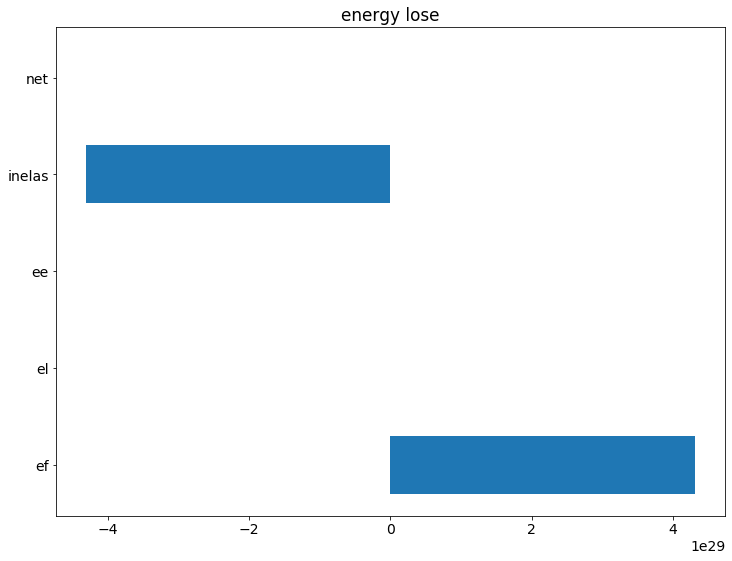

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.barh(range(5),
        width=[energy_gain_ef, energy_lose_el, energy_gain_ee, energy_gain_e_inelas, energy_gain_net],
       height=0.6)
ax.set_yticks(range(5))
ax.set_yticklabels(['ef', 'el', 'ee', 'inelas', 'net'])
ax.set_title("energy lose")

In [47]:
eedf.inelas_rctn_info

,formula,type,threshold_eV,rate const,energy lose
0,E + CO2 => E + CO2(v1),excitation,2.9e-01,3.7e-15,1.1e-15
1,E + CO2 => E + CO2(v2),excitation,5.8e-01,1.6e-15,9.0e-16
2,E + CO2 => E + CO2(v3),excitation,8.6e-01,7.3e-16,6.3e-16
3,E + CO2 => E + CO2(v4),excitation,1.1e+00,3.5e-16,4.0e-16
4,E + CO2 => E + CO2(v5),excitation,1.4e+00,1.7e-16,2.5e-16
5,E + CO2 => E + CO2(v6),excitation,1.7e+00,8.5e-17,1.4e-16
6,E + CO2 => E + CO2(v7),excitation,2.0e+00,4.1e-17,8.1e-17
7,E + CO2 => E + CO2(v8),excitation,2.2e+00,2.0e-17,4.5e-17
8,E + CO2 => E + CO2(v9),excitation,2.5e+00,9.5e-18,2.4e-17
9,E + CO2 => E + CO2(v10),excitation,2.8e+00,4.4e-18,1.2e-17


In [48]:
1e-06*(7.14e-8 * exp(-177*Tg_K()^(-1/3.0) + 451*Tg_K()^(-2/3.0) ) *(1.000000)*(1.000000)*
           (0.5 * (3-exp(-2/3.0*(0.320000*0.082942*11604.5/4.441624* sqrt(22.004750/Tg_K())))) 
                *    exp(-2/3.0*(0.320000*0.082942*11604.5/4.441624* sqrt(22.004750/Tg_K())))
           )/(0.5*(3-exp(-2/3.0*(0.320000*0.082942*11604.5/4.441624* sqrt(22.004750/Tg_K()))))
                *    exp(-2/3.0 *(0.320000*0.082942*11604.5/4.441624* sqrt(22.004750/Tg_K()))))
      )"

AttributeError: 'DataFrame' object has no attribute 'so'

In [ ]:
1e-06*(7.14e-8*exp(-177*Tg_K()^(-1/3.0)+451*Tg_K()^(-2/3.0))*(0.700000)*(1.000000)*
       (0.5  *(3-exp(-2/3.0*(0.320000*0.082942*11604.5/4.587156* sqrt(17.116320/Tg_K()))))
             *   exp(-2/3.0 *(0.320000*0.082942*11604.5/4.587156* sqrt(17.116320/Tg_K())))
       )/(0.5*(3-exp(-2/3.0*(0.320000*0.082942*11604.5/4.587156* sqrt(17.116320/Tg_K()))))
             *   exp(-2/3.0 *(0.320000*0.082942*11604.5/4.587156* sqrt(17.116320/Tg_K())))))"


In [64]:
a = r"""1e-06*(4.25e-1*exp(-407*Tg_K()^(-1/3.0)+824*Tg_K()^(-2/3.0))*(1.000000)*(3.022449)*
       (0.5  *(3-exp(-2/3.0*(0.320000*0.205413*11604.5/4.441624* sqrt(22.004750/Tg_K()))))
             *   exp(-2/3.0 *(0.320000*0.205413*11604.5/4.441624* sqrt(22.004750/Tg_K())))
       )/(0.5*(3-exp(-2/3.0*(0.320000*0.208548*11604.5/4.441624* sqrt(22.004750/Tg_K()))))
             *   exp(-2/3.0 *(0.320000*0.208548*11604.5/4.441624* sqrt(22.004750/Tg_K()))))
       + 8.57e-1*exp(-404*Tg_K()^(-1/3.0)+1096*Tg_K()^(-2/3.0))*(1.000000)*(3.006018)*
       (0.5  *(3-exp(-2/3.0*(0.320000*0.125192*11604.5/4.441624* sqrt(22.004750/Tg_K()))))
             *   exp(-2/3.0 *(0.320000*0.125192*11604.5/4.441624* sqrt(22.004750/Tg_K())))
       )/(0.5*(3-exp(-2/3.0*(0.320000*0.125271*11604.5/4.441624* sqrt(22.004750/Tg_K()))))
             *   exp(-2/3.0 *(0.320000*0.125271*11604.5/4.441624* sqrt(22.004750/Tg_K())))) 
       + 1.43e-5*exp(-252*Tg_K()^(-1/3.0)+685*Tg_K()^(-2/3.0))*(1.000000)*(2.910585)*
         (0.5*(3-exp(-2/3.0*(0.320000*0.044635*11604.5/4.441624* sqrt(22.004750/Tg_K()))))
             *   exp(-2/3.0 *(0.320000*0.044635*11604.5/4.441624* sqrt(22.004750/Tg_K())))
         )/(0.5*(3-exp(-2/3.0*(0.320000*0.041659*11604.5/4.441624* sqrt(22.004750/Tg_K()))))
               *   exp(-2/3.0 *(0.320000*0.041659*11604.5/4.441624* sqrt(22.004750/Tg_K())))))"""


In [65]:
from math import (exp, sqrt)
a = a.replace("Tg_K()", 'Tgas').replace('^', '**')